**HR ANALYTICS: PREDICT EMPLOYEE ATTRITION**

**PART 1 - DATA EXPLORATORY ANALYSIS**

**Objective**

The objective of this notebook is to implement Exploratory Data Analysis to analyse a Kaggle's dataset, IBM HR Analytics Employee Attrition and Performance, in order to discover the reasons why employees quit at IBM. Questions in concerned can be: 
- What affects their decision to leave?  
- At what age are they more likely to leave?  
- Are they happy with the working environment?  
- What is the average amount of years employees tend to stay until they decide to leave?  

**Types of Analysis**

There are 4 parts in Exploratory Data Analysis:
- Data information
- Univariate Analysis
- Bivariate Analysis
- Multiple Correspondence Analysis


In [2]:
import pandas as pd 
import numpy as np
import itertools

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.style.use('seaborn')

# Exploratory Data Analysis

## Data Information

The dataset has **1470 observations and 35 columns** with mixed categorical and numerical variables. There is no missing value in the dataset. The target variable is 'Attrition'.

'Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber', are dropped before the analysis as they do not have exploratory patterns or contain similar information with other more useful variables. 

**Numerical variables** are 'Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'DailyRate',’ 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'. 

**Categorical variables** are 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'

**Variables Description**
    
**Education**
- 1 'Below College' 
- 2 'College' 
- 3 'Bachelor' 
- 4 'Master' 
- 5 'Doctor'

**EnvironmentSatisfaction** 
- 1 'Low' 
- 2 'Medium' 
- 3 'High' 
- 4 'Very High'

**JobInvolvement**
- 1 'Low' 
- 2 'Medium' 
- 3 'High' 
- 4 'Very High'

**JobSatisfaction**
- 1 'Low' 
- 2 'Medium' 
- 3 'High' 
- 4 'Very High'

**PerformanceRating**
- 1 'Low'
- 2 'Good' 
- 3 'Excellent' 
- 4 'Outstanding'

**RelationshipSatisfaction**
- 1 'Low' 
- 2 'Medium' 
- 3 'High' 
- 4 'Very High'

**WorkLifeBalance**
- 1 'Bad' 
- 2 'Good' 
- 3 'Better' 
- 4 'Best'

In [3]:
data = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [122]:
print(f'Data has {data.shape[0]} rows, {data.shape[1]} columns')

Data has 1470 rows, 35 columns


In [121]:
print(f'Features are: {data.columns}')

Features are: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [18]:
categorical_features = [x for x in data.columns if data[x].dtype =='object' if x != 'Attrition']
numerical_features = [x for x in data.columns if data[x].dtype !='object']
print(f'Categorical features are: \n {categorical_features}')
print(f'Numerical features are: \n {numerical_features}')

Categorical features are: 
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical features are: 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


**Check null values**

In [125]:
# Check to see if there are any missing values in our data set
print(f'Data has {data.isnull().any().sum()} missing values')

Data has 0 missing values


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

**For the next analysis, data is grouped into 5 groups: Personal, Job-Related, Salary-Related, Working-Length, and Job-Satisfaction in order to study:**
- Which group has the most effect on the leaving decision
- Which features in each group has the most effect on the leaving decision

Due to high dimensionality, this grouping also helps to detect the features that have the least explanatory power on the target in Multiple Correspondence Analysis.

**Features belong to each group**

**Personal**  
- 'Age'
- 'Education'
- 'EducationField'
- 'Gender'
- 'MaritalStatus'
- 'DistanceFromHome'
- 'NumCompaniesWorked' 

**Job-Related** 
- 'Department'
- 'JobInvolvement'
- 'JobLevel'
- 'JobRole'
- 'BusinessTravel’
- 'StockOptionLevel' 

**Salary-Related** 
- 'MonthlyIncome'
- 'HourlyRate'
- 'DailyRate'
- 'MonthlyRate'
- 'PercentSalaryHike'
- 'OverTime' 

**Working-Length** 
- 'TotalWorkingYears'
- 'TrainingTimesLastYear'
- 'YearsAtCompany'
- 'YearsInCurrentRole'
- 'YearsSinceLastPromotion'
- 'YearsWithCurrManager' 

**Job-Satisfaction** 
- 'JobSatisfaction'
- 'RelationshipSatisfaction'
- 'EnvironmentSatisfaction'
- 'PerformanceRating'
- 'WorkLifeBalance' 

## Univariate Analysis

The first analysis is to study the target variable and how each variable affects the target variable.

**Plot functions used in univariate analysis**

In [6]:
def plot_target(df,target='Attrition'):
    # plot Attrition Yes - No
    keys, counts = np.unique(df[target], return_counts=True)
    counts_norm = counts/counts.sum()

    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) 

    #Absolute values
    ax0 = plt.subplot(gs[0])
    ax0 = plt.bar(['No', 'Yes'], counts, color=['darkseagreen','lightsteelblue']) 
    ax0 = plt.title(f'{target} Absolute Distribution', fontsize=17) 
    
    #ax0 = plt.ylabel('Number')
    ax0 = plt.text(['No'], counts[0]/3, counts[0]) 
    ax0 = plt.text(['Yes'], counts[1]/3, counts[1]) 
    ax0 = plt.xticks(fontsize=15)
    #Normalized values
    ax1 = plt.subplot(gs[1])
    ax1 = plt.bar(['Data'], [counts_norm[0]], label='No', color='darkseagreen')
    ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='Yes', color='lightsteelblue')
    ax1 = plt.legend(bbox_to_anchor=(1, 1))
    ax1 = plt.title(f'{target} Relative distribution',fontsize=18)
    #ax1 = plt.ylabel('Rate')
    ax1 = plt.text(['Data'],counts_norm[0]/3, '{}%'.format((counts_norm[0]*100).round(1)))
    ax1 = plt.text(['Data'],(counts_norm[1]/3)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))
    ax1 = plt.xticks(fontsize=15)
    plt.tight_layout()
    plt.show()


def plot_categorical_vs_target(df,feature,target='Attrition'):
    fig = plt.figure(figsize=(15, 5)) 
    #Absolute distribution
    plt.subplot(121)
    ax1 = df.groupby([feature,target])[target].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7,color=['darkseagreen','lightsteelblue'])
    plt.title(f'{target} by {feature}: \n Absolute distribution',fontsize=18) 
    #plot bar labels
    for p in ax1.patches:
        #ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))
        ax1.text(p.get_x()+0.01,p.get_height() * 0.605,str(p.get_height()),fontsize=12)
    plt.xticks(rotation=45)
    #Relative distribution
    plt.subplot(122)
    ax2 = df.groupby([feature,target])[target].size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(),color=['darkseagreen','lightsteelblue'])
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(f'{target} by {feature}:\n Relative distribution',fontsize=18) 
    #plot bar labels
    n = len(data[feature].unique())
    for p, q in zip(ax2.patches[0:n], ax2.patches[n:n*2]):
        #ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
        #ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))
        ax2.text(p.get_x()+0.01, p.get_height()/2,str(round(p.get_height(),1)) + '%',fontsize=12)
        ax2.text(q.get_x()+0.01,q.get_height()/2+p.get_height(), str(round(q.get_height(),1)) + '%',fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_numerical_vs_target(df,feature,target='Attrition'):
    plt.figure(figsize=(15,5))

    plt.subplot(121)
    sns.histplot(df,x=feature,hue=target,kde = False)
    plt.title(f'{target} by {feature}: \n Absolute distribution',fontsize=18)
    plt.xticks(fontsize=15)
    
    plt.subplot(122)
    #get relative count of Attrition: Yes
    results_yes, edges_yes = np.histogram(df[feature].loc[data[target] == 'Yes'],density=True)
    binWidth_yes = edges_yes[1] - edges_yes[0]
    plt.bar(edges_yes[:-1], results_yes*binWidth_yes, binWidth_yes, alpha=0.8, label='Yes',color='lightsteelblue')

    #get relative count of Attrition: No
    results_no, edges_no = np.histogram(df[feature].loc[data[target] == 'No'], density=True)
    binWidth_no = edges_no[1] - edges_no[0]
    plt.bar(edges_no[:-1], results_no*binWidth_no, binWidth_no, alpha=0.8, label='No',color='darkseagreen')
    plt.legend()
    plt.xlabel(f'{feature}')
    plt.title(f'{target} by {feature}:\n Relative distribution',fontsize=18)
    plt.xticks(fontsize=15)
    plt.show()

**Target Variable - Attrition**

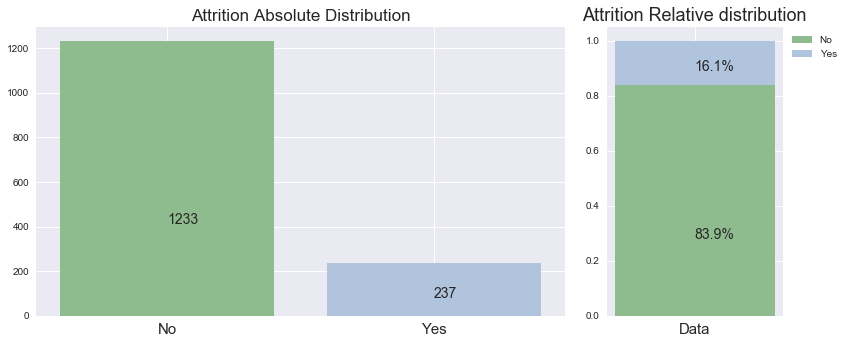

In [53]:
plot_target(data,target='Attrition')

The dataset is very imbalanced.

**Numerical Variables**

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Personal Group Variables and Attrition**

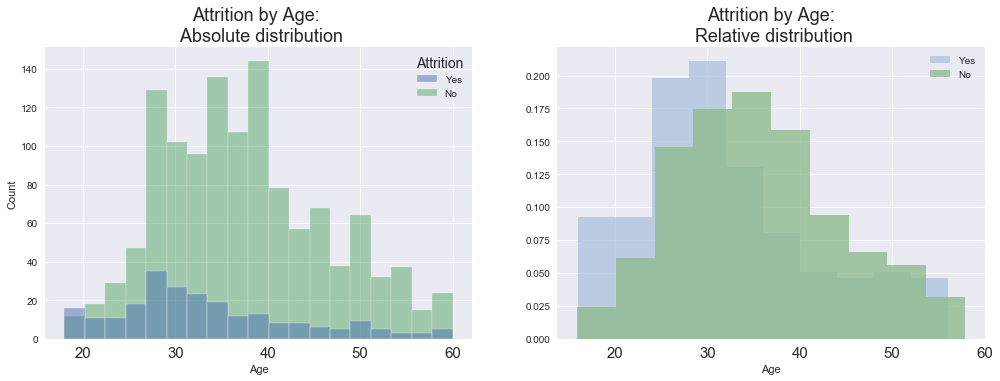

None


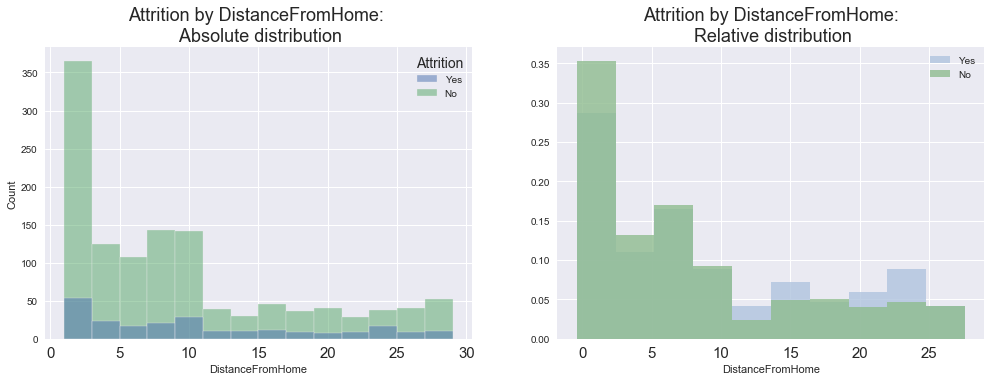

None


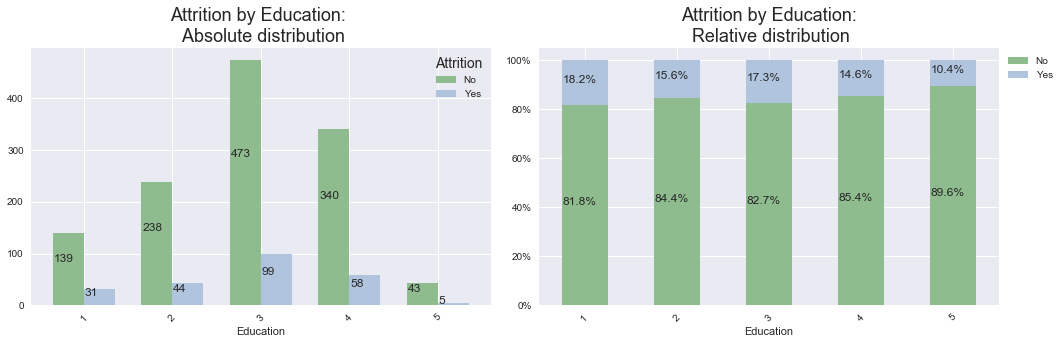

None


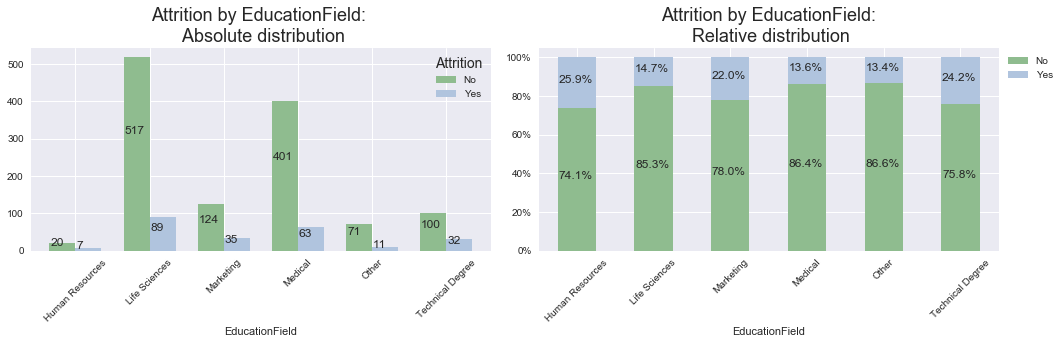

None


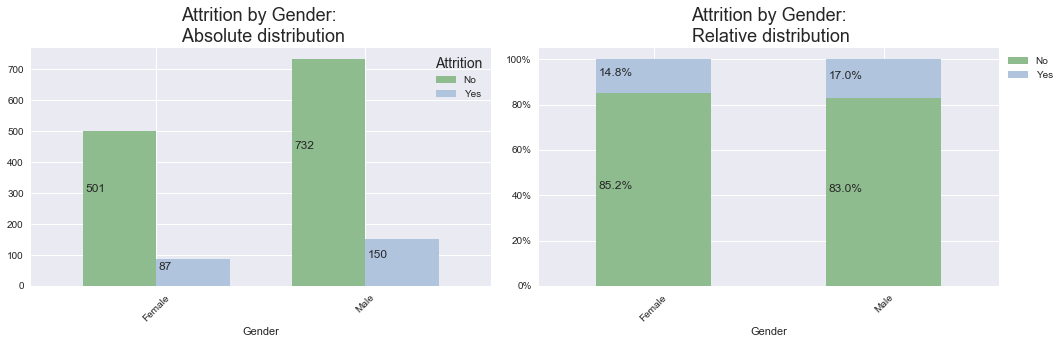

None


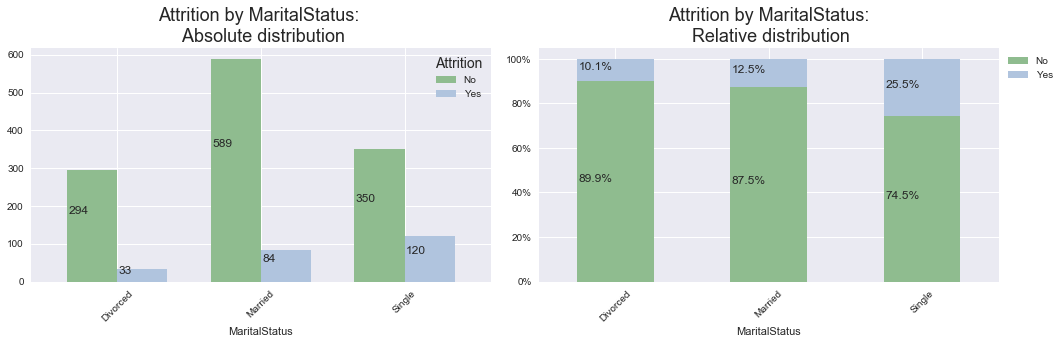

None


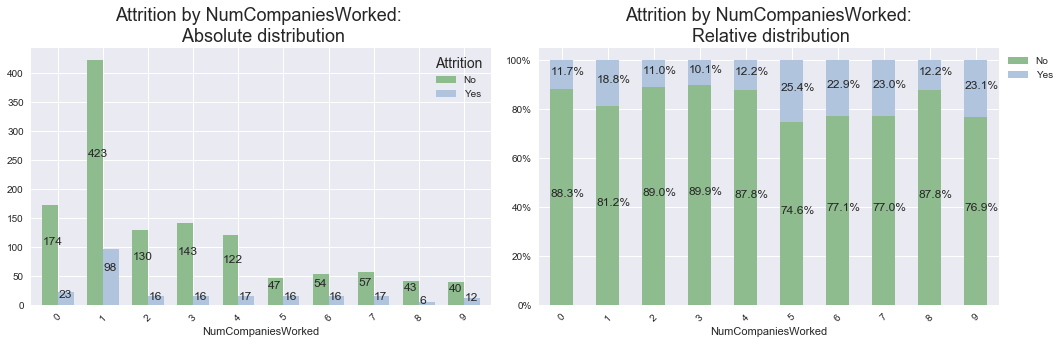

None


In [22]:
personal_group1 = ['Age','DistanceFromHome']
personal_group2 = ['Education','EducationField','Gender','MaritalStatus','NumCompaniesWorked']
for feature in personal_group1:
    print(plot_numerical_vs_target(data,feature,target='Attrition'))
for feature in personal_group2:
    print(plot_categorical_vs_target(data,feature,target='Attrition'))
    

***Observations***

Groups that have high attrition rate:
- Ages from 18 to 33 and 52 to 56 
- Long distance from home 
- Human Resources, Marketing, and Technical degree
- Single people
- Previously worked in many companies 

Attrition rate is not so different among genders and education level.

**Job-Related Variables and Attrition**

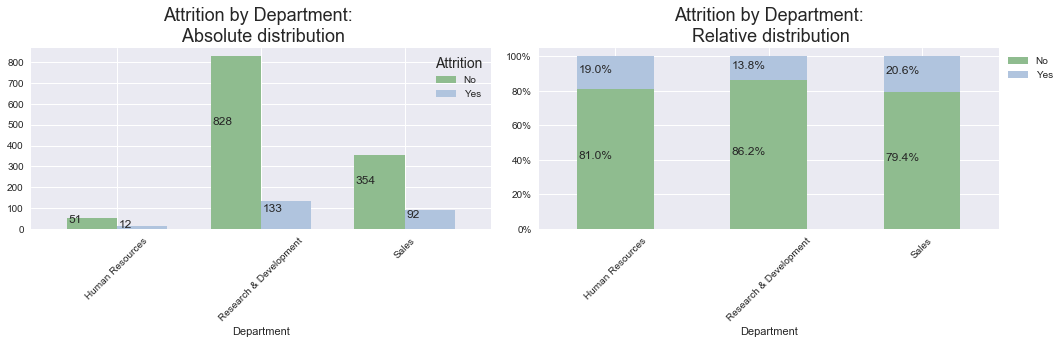

None


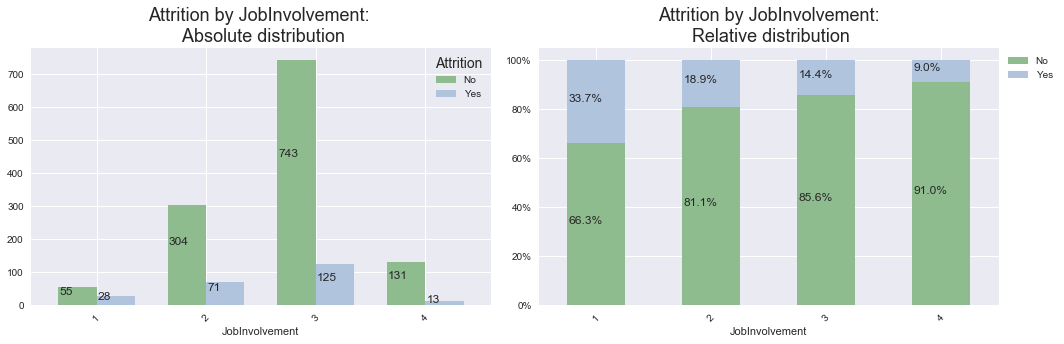

None


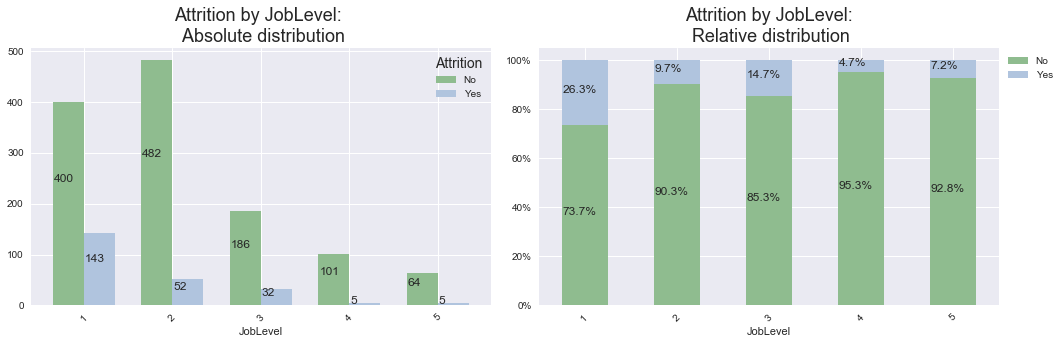

None


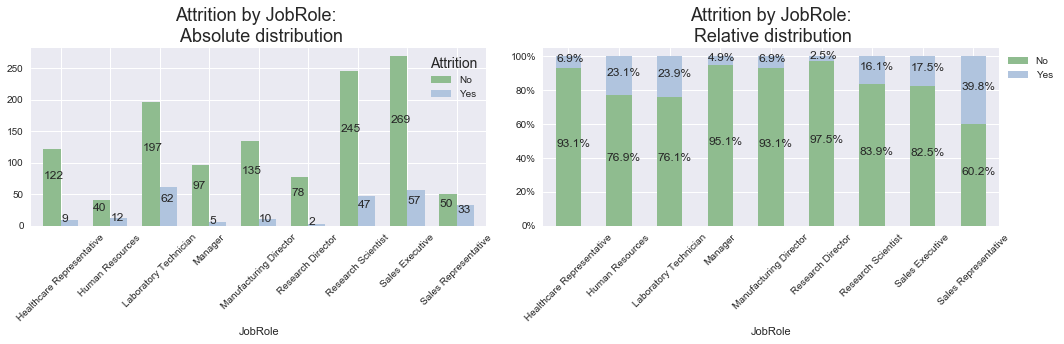

None


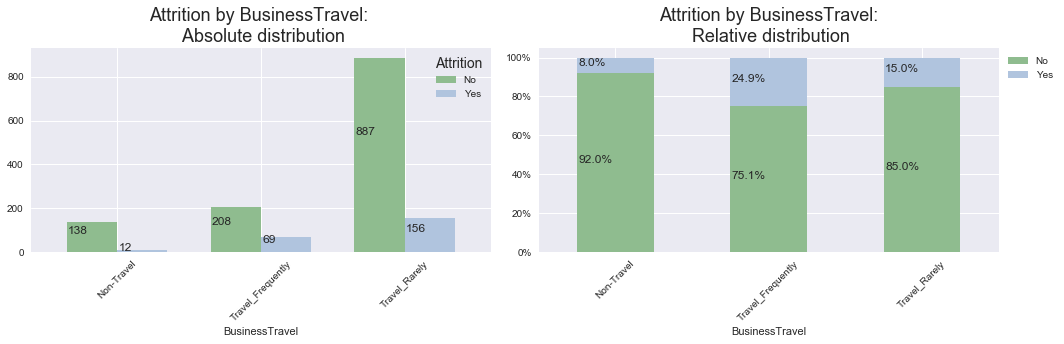

None


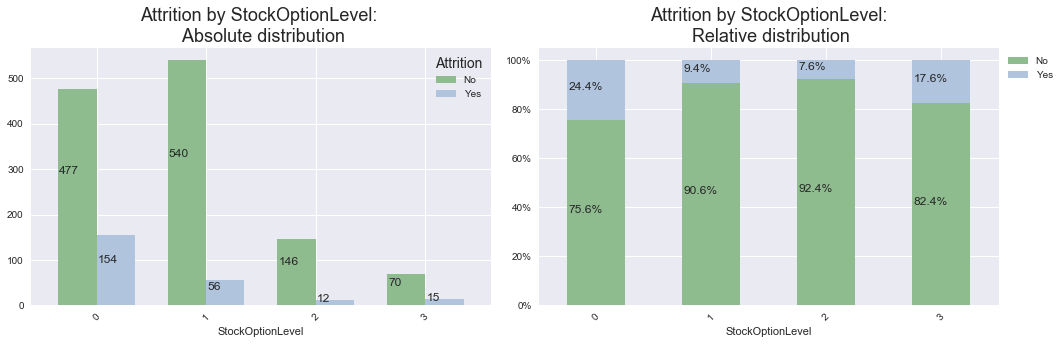

None


In [23]:
job_group = ['Department','JobInvolvement','JobLevel','JobRole','BusinessTravel','StockOptionLevel']
for feature in job_group:
    print(plot_categorical_vs_target(data,feature,target='Attrition'))

***Observations***

Groups that have high attrition rate:
- Human Resources and Sales departments
- Low job involvement
- Low job level
- Job roles: Human Resources, Laboratory Technician, Reseacrh Scientist, Sales Executive, Sales Representatives
- Have to travel frequently for business


**Salary-Related Variables and Attrition**

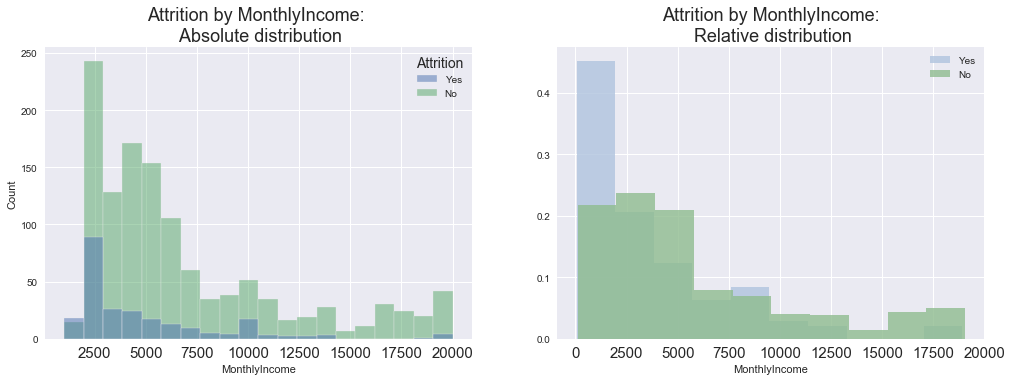

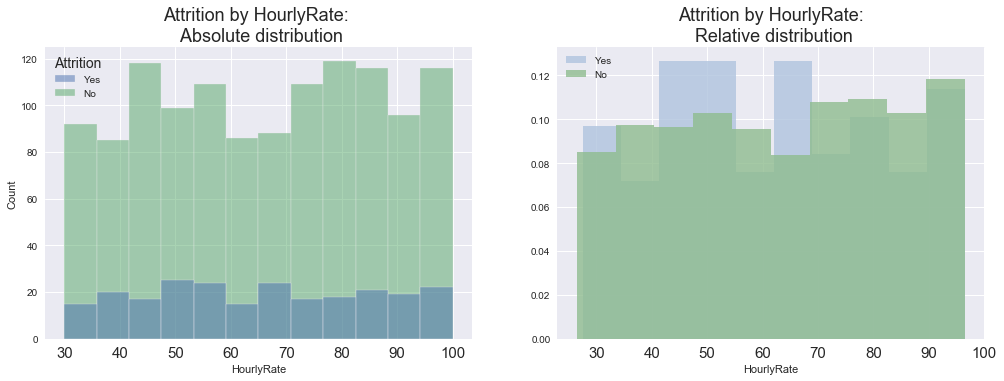

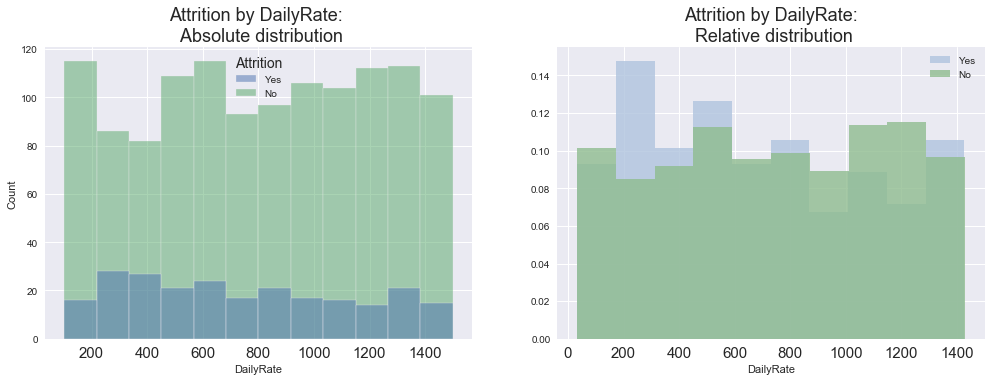

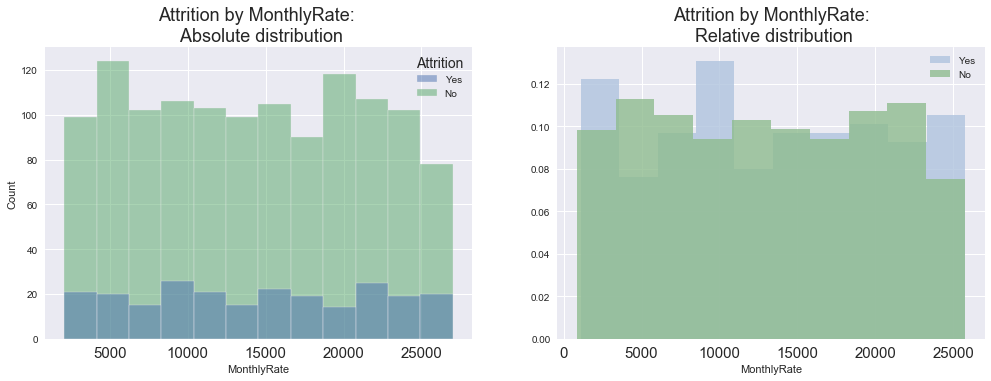

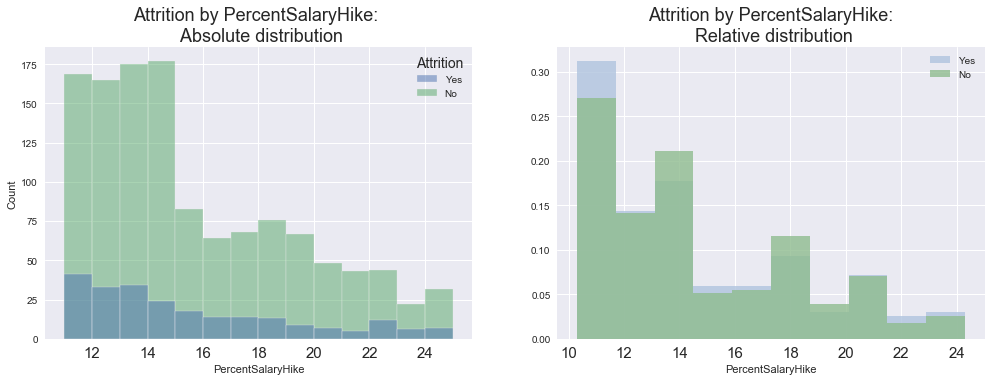

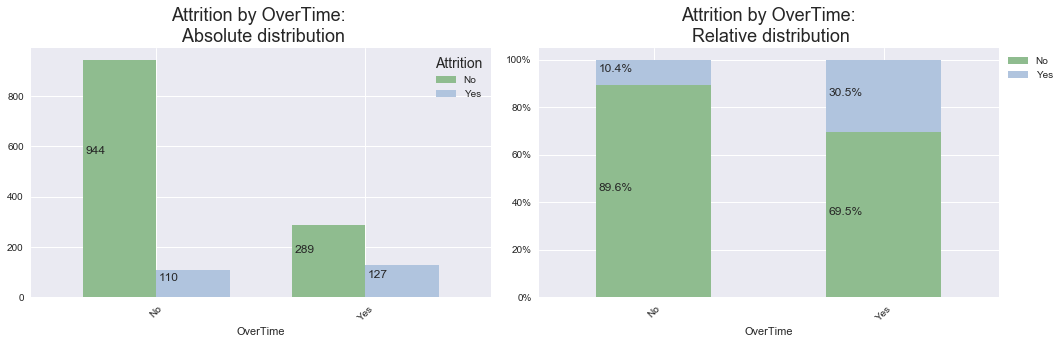

In [24]:
salary_group1 = ['MonthlyIncome','HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike']
salary_group2 = ['OverTime']
for feature in salary_group1:
    plot_numerical_vs_target(data,feature,target='Attrition')
for feature in salary_group2:
    plot_categorical_vs_target(data,feature,target='Attrition') 

***Observations***

Groups that have high attrition rate:
- Low monthly income
- Low to average hourly rate
- Low to average daily rate, highest daily rate
- Low to average monthly rate, highest monthly rate 
- Low percentage hike in Salary
- Have to work overtime


**Working-Length Variables and Attrition**

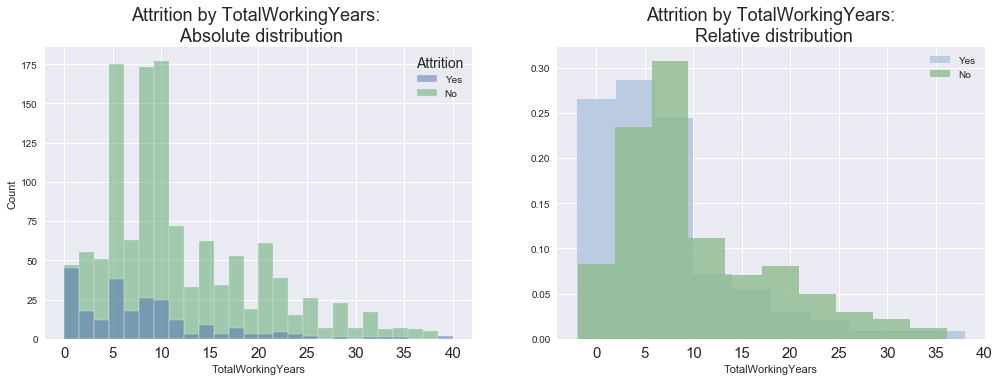

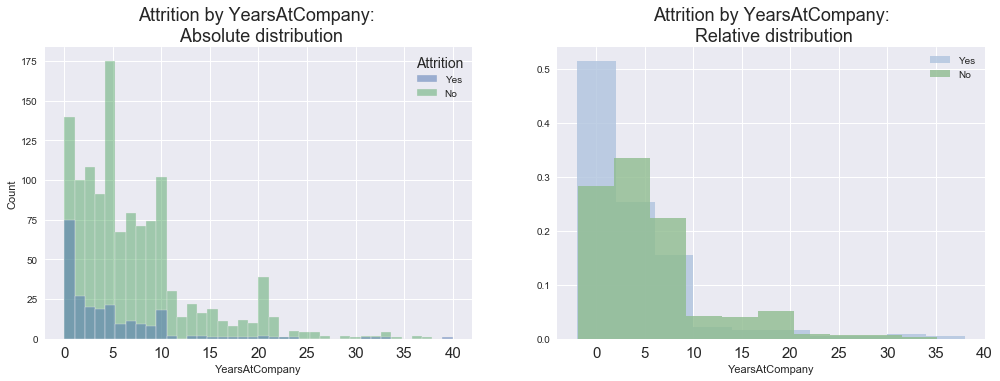

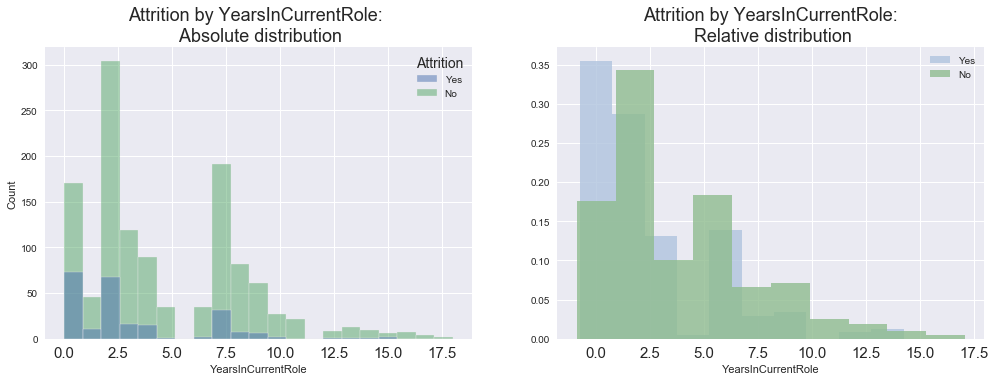

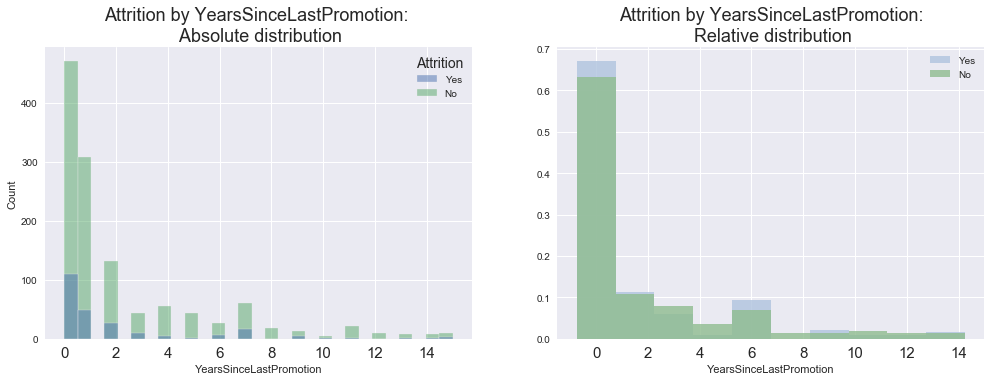

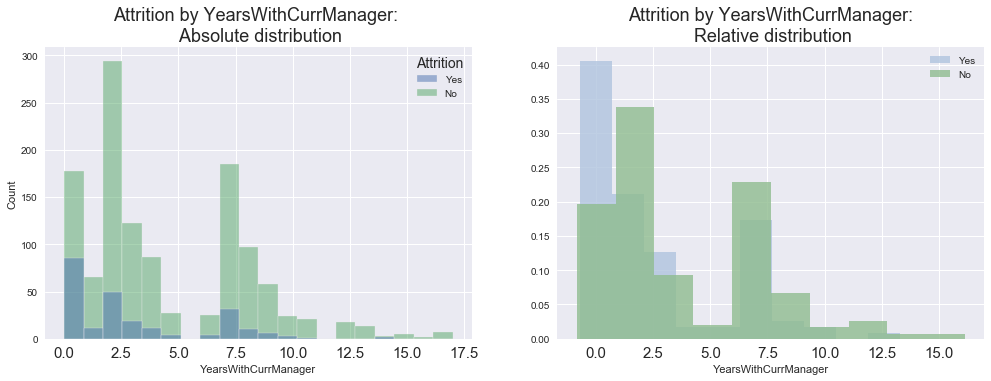

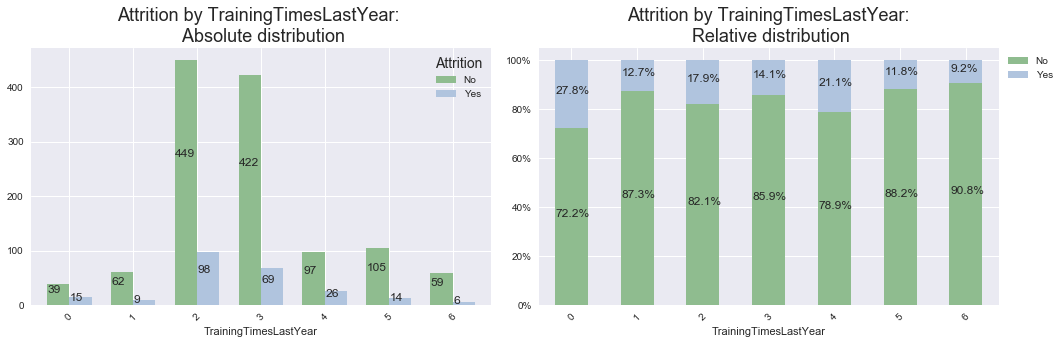

In [25]:
working_group1 = ['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
working_group2 = ['TrainingTimesLastYear']
for feature in working_group1:
    plot_numerical_vs_target(data,feature,target='Attrition')
for feature in working_group2:
    plot_categorical_vs_target(data,feature,target='Attrition') 


***Observations***

Groups that have high attrition rate:
- Have non or a few previous working years (0-5 years)
- Have non or a few working years at the current company (0-5 years)
- Have non or a few working years at the current role (0-2.5 years)
- Have non or 1 year since last promotion
- Have non or a few years working with the current manager

**Job-Satisfaction Variables and Attrition** 

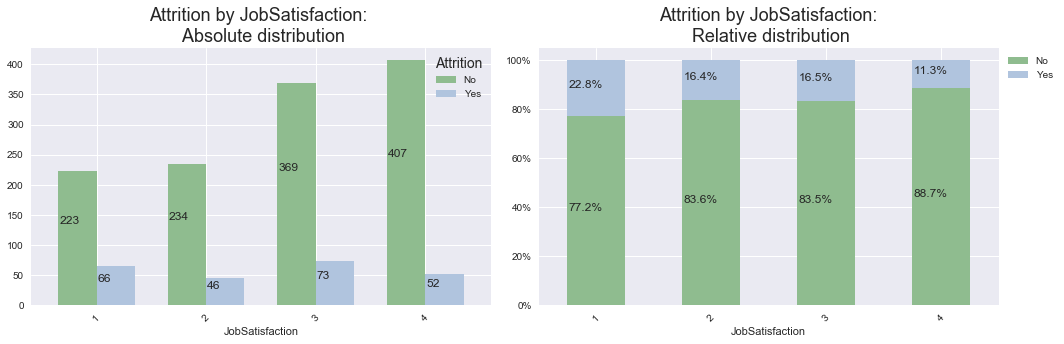

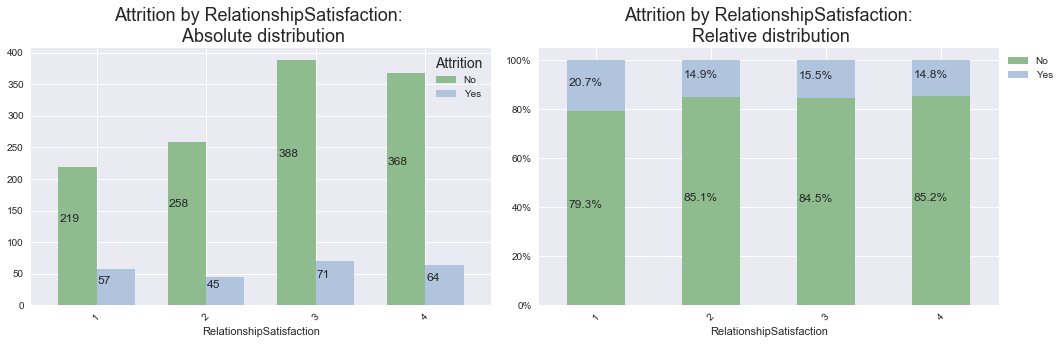

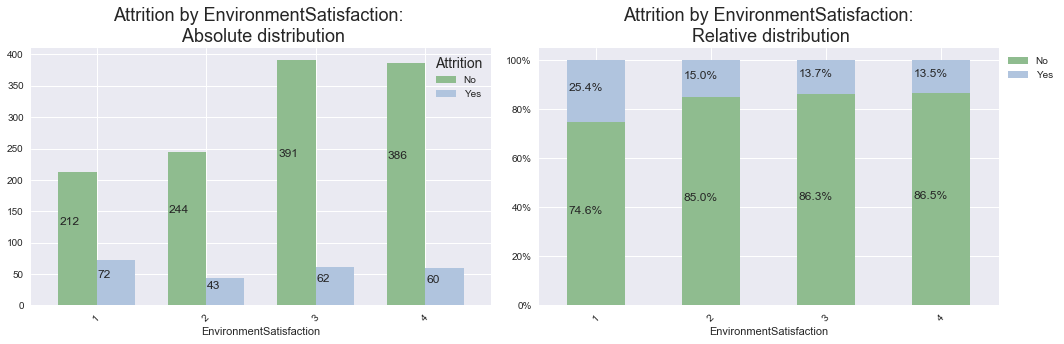

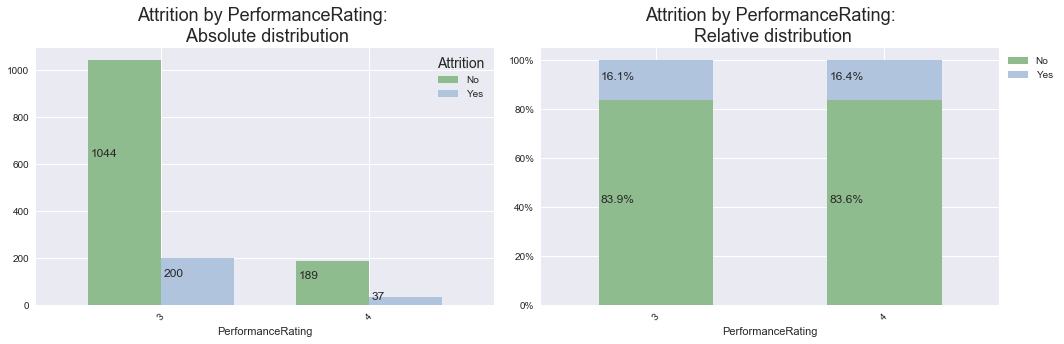

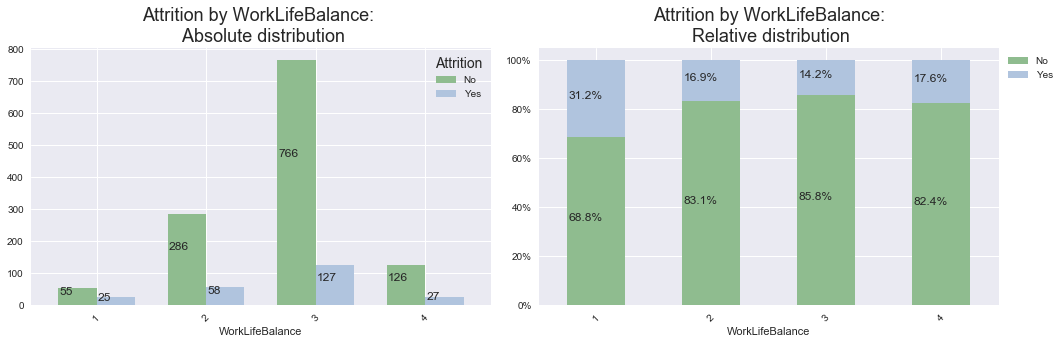

In [26]:
satisfaction_group = ['JobSatisfaction','RelationshipSatisfaction','EnvironmentSatisfaction','PerformanceRating','WorkLifeBalance']
for feature in satisfaction_group:
    plot_categorical_vs_target(data,feature,target='Attrition')

***Observations***

Groups that have high attrition rate:
- Low job satisfaction
- Low relationship satisfaction
- Low environment satisfaction
- Low performance rating
- Low work life balance

## Bivariate Analysis

This analysis studies how bivariate (2 variables) have effect on the attrition rate.

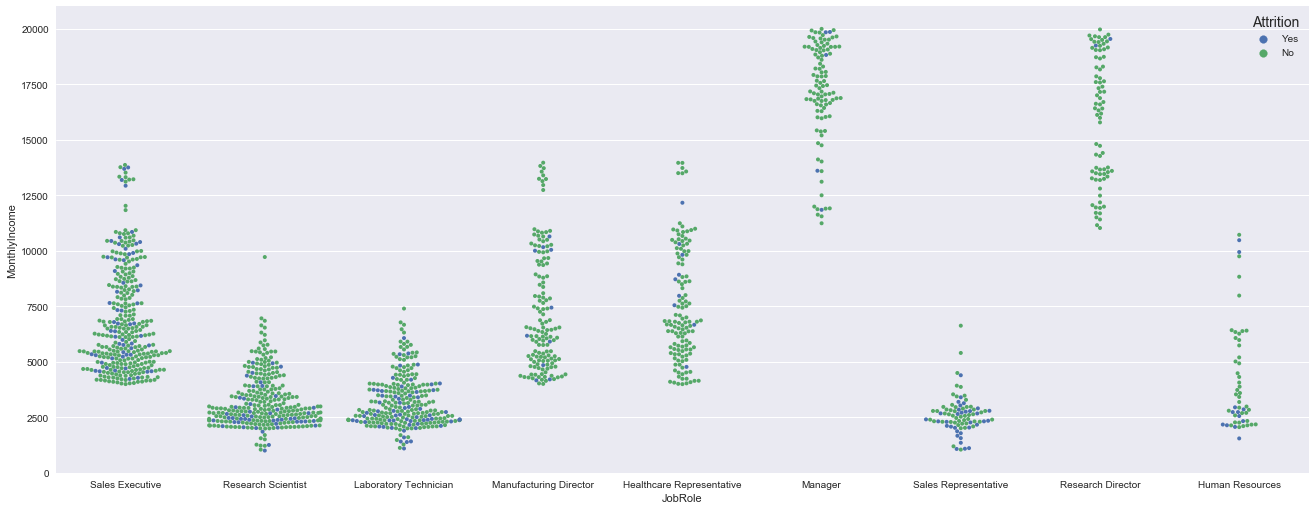

In [94]:
fig = plt.figure(figsize=(20,8))
sns.swarmplot(x='JobRole', y= 'MonthlyIncome' ,hue='Attrition', data = data,size=4)
plt.show()

Research Scientist, Laboratory Technician, Sales Representative and Human Resources have lower income and higher attrition rate than others.

<Figure size 2160x576 with 0 Axes>

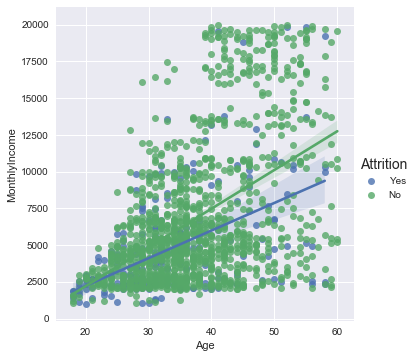

In [101]:
plt.figure(figsize=(30,8))
sns.lmplot(x='Age', y= 'MonthlyIncome' ,hue='Attrition',data = data)
plt.show()

Young people who has low income has highest tendency to quit than others.

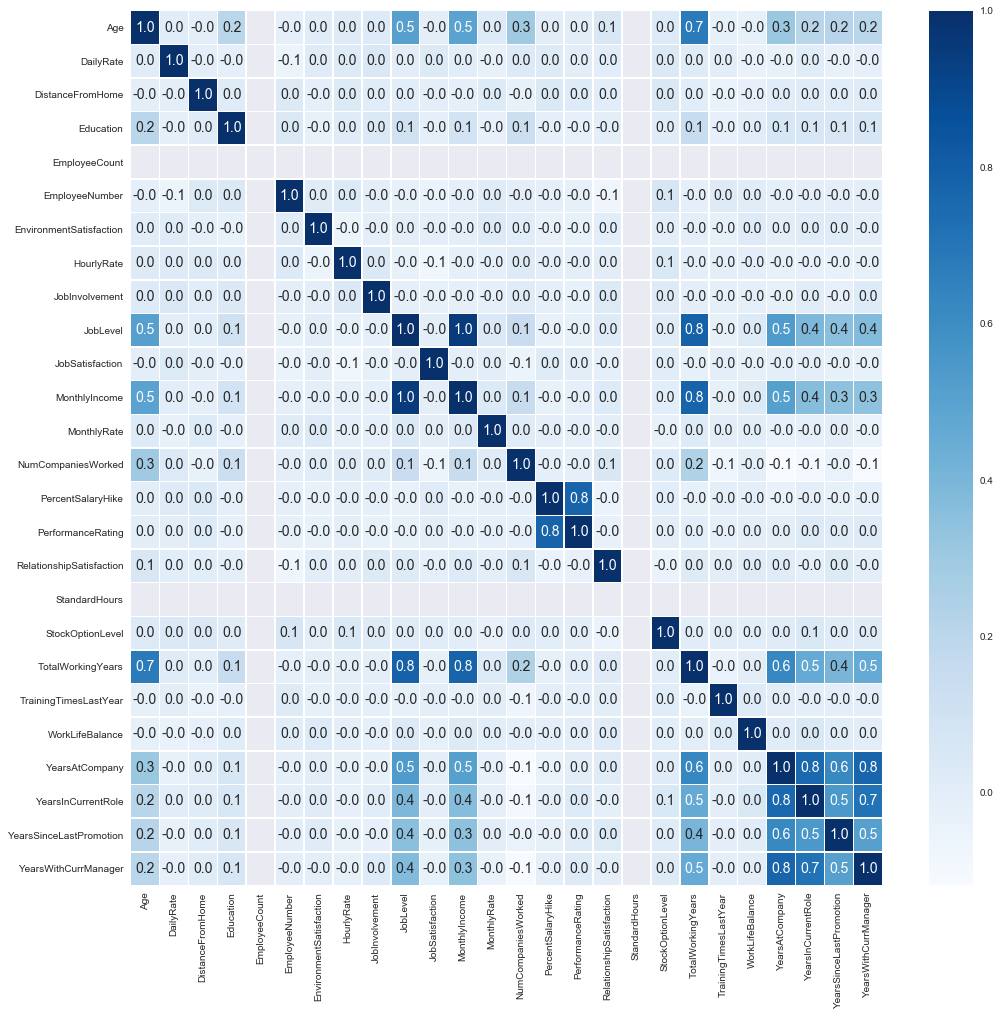

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap = 'Blues',annot=True, linewidths=.5, fmt= '.1f')

Variables that are highly possitive correlated:
- PercentSalaryHike and PerformanceRating 
- MonthlyIncome and Job Level
- Age and TotalWorkingYears
- TotalWorkingYears and JobLevel
- TotalWorkingYears and MonthlyIncome
- YearsAtCompany, YearsAtCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager, TotalWorkingYears. 

Variables that are moderately positive correlated:
- JobLevel and YearsAtCompany, YearsAtCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager
- MonthlyIncome and YearsAtCompany, YearsAtCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager
- Age and YearsAtCompany, YearsAtCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager

## Multiple Correspondence Analysis (MCA)

This analysis study how independent variables in combination have effect on the target variable

**Setup for using R in Python Jupyter Notebook**

In [ ]:
import os
os.environ['PATH'] = 'C:/Program Files/R/R-4.0.0/bin/x64' + os.pathsep + os.environ.get('PATH', '')
import rpy2.situation
#for row in rpy2.situation.iter_info():print(row)

%load_ext rpy2.ipython

**Install and import R libraries**

In [ ]:
%%R
#install.packages("dplyr",repos='http://cran.us.r-project.org',quiet=TRUE)
#install.packages(c("FactoMineR", "factoextra"),repos='http://cran.us.r-project.org',quiet=TRUE)
#install.packages("repr",repos='http://cran.us.r-project.org',quiet=TRUE) #library to help with ggplot2 size
#install.packages("ggrepel",repos='http://cran.us.r-project.org',quiet=TRUE)
library(FactoMineR)
library(factoextra)
library(dplyr) 
library(ggplot2)
library(repr)
library(ggrepel)
options(repr.plot.width=10, repr.plot.height=8)

**Prepare data**

In [12]:
%%R
data <- read.csv(".\data\.processed_data.csv")

In [13]:
%%R
personal <- data %>% select('Age','Education','EducationField','Gender','MaritalStatus','DistanceFromHome','NumCompaniesWorked','Attrition')
work_related <- data %>% select('Department','JobInvolvement','JobLevel', 'JobRole','BusinessTravel','StockOptionLevel','Attrition')
salary_related <- data %>% select('MonthlyIncome', 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike','OverTime','Attrition')
working_length <- data %>% select('TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager','Attrition')
satisfaction <- data %>% select('JobSatisfaction','RelationshipSatisfaction','EnvironmentSatisfaction','PerformanceRating','WorkLifeBalance','Attrition')

**Prepare helpful functions to perform multiple correspondence analysis (mca) and plot**

In [73]:
%%R -w 30 -h 15 -u cm
mca_df <- function(df) {
  mca <- MCA(as.matrix(df),graph = FALSE)
  cats = apply(df,2,function(x) nlevels(as.factor(x)))
  mca_vars_df = data.frame(mca$var$coord, Variable = rep(names(cats), cats))
  # data frame with observation coordinates
  mca_obs_df = data.frame(mca$ind$coord)
  return(list(mca_vars_df,mca_obs_df))
}
               
mca_plot <- function(mca_vars_df,mca_obs_df,title="Personal") {
  p = ggplot(data = mca_obs_df, aes(x = Dim.1, y = Dim.2)) +
  geom_hline(yintercept = 0, colour = "gray70") +
  geom_vline(xintercept = 0, colour = "gray70") +
  #geom_point(colour = "gray80", alpha = 0.7) +
  geom_density2d(colour = "gray70") +
  geom_text_repel(data = mca_vars_df, 
            aes(x = Dim.1, y = Dim.2, 
                label = rownames(mca_vars_df), colour = Variable)) +
  ggtitle(title) +
  scale_colour_discrete(name = "Variable")

print(p)
}              

### MCA for each group

**Personal Group Variables and Attrition**

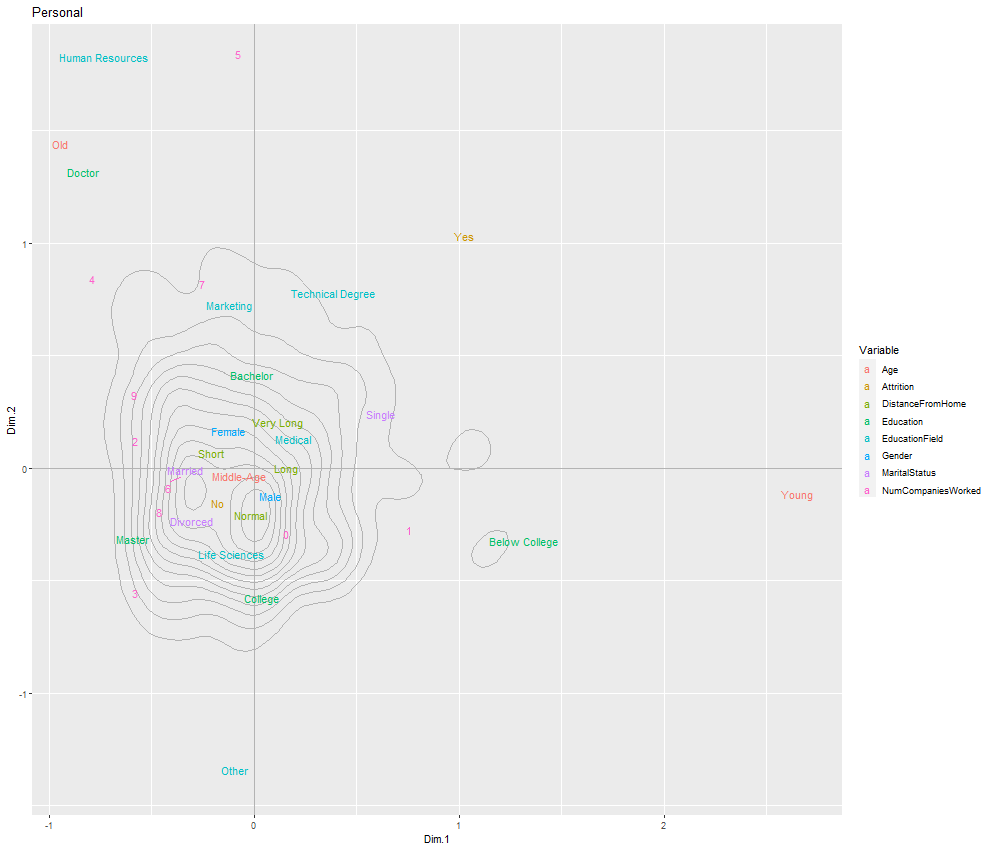

In [79]:
%%R -w 35 -h 30 -u cm
mca1 = mca_df(personal)
mca_plot(mca1[[1]],mca1[[2]])

**Job-Related Variables and Attrition**

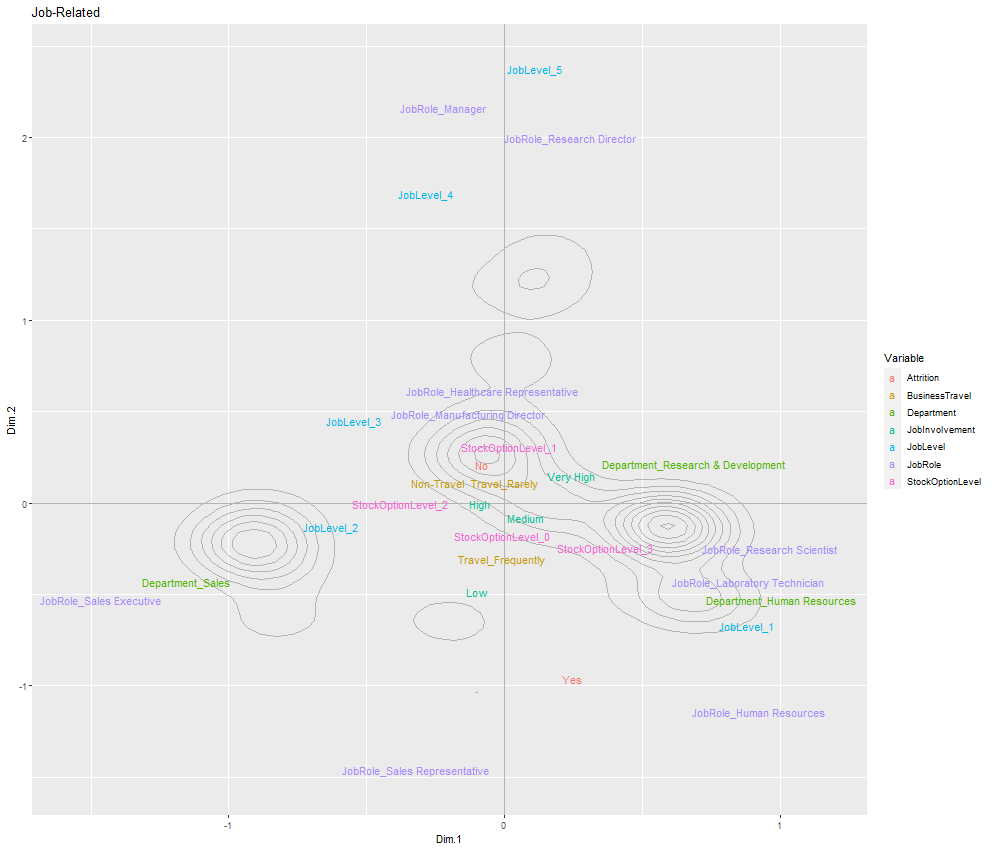

In [77]:
%%R -w 35 -h 30 -u cm
mca2 = mca_df(work_related)
mca_plot(mca2[[1]],mca2[[2]],title="Job-Related")

**Salary-Related Variables and Attrition**

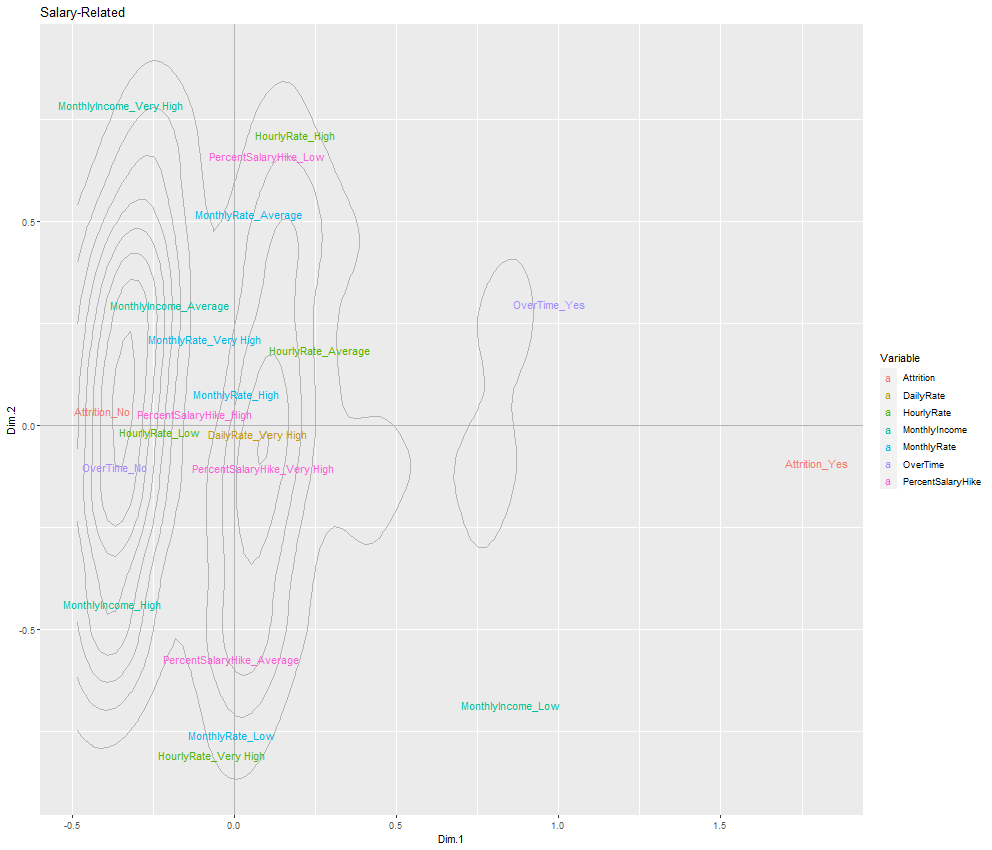

In [80]:
%%R -w 35 -h 30 -u cm
mca3 = mca_df(salary_related)
mca_plot(mca3[[1]],mca3[[2]],title="Salary-Related")

**Working-Length Variables and Attrition**

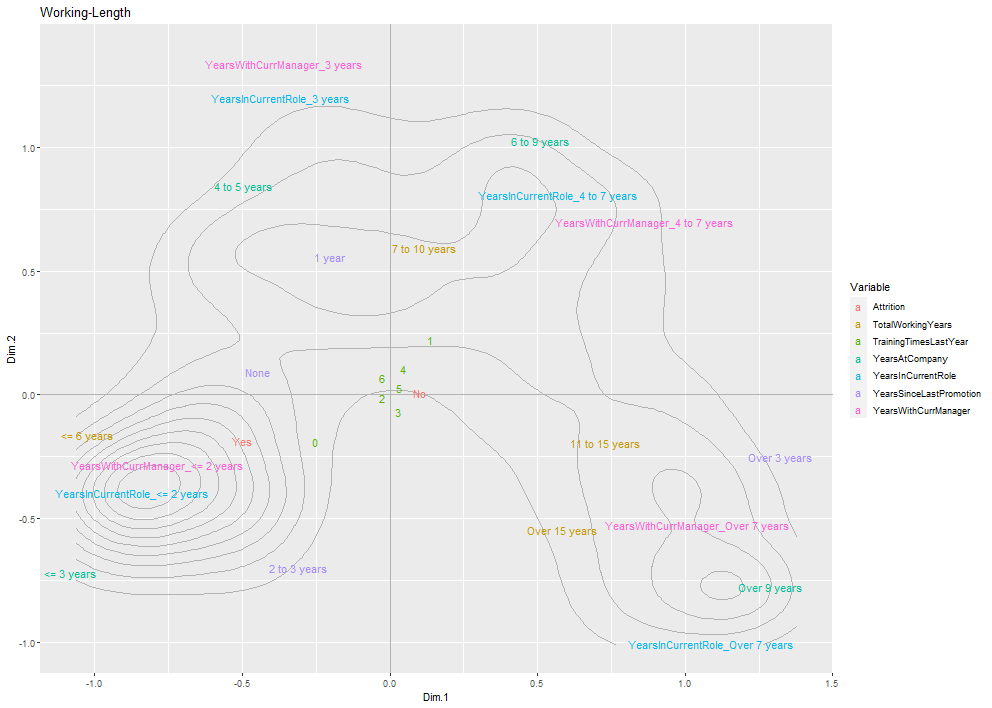

In [81]:
%%R -w 35 -h 25 -u cm
mca4 = mca_df(working_length)
mca_plot(mca4[[1]],mca4[[2]],title="Working-Length")

**Job-Satisfaction Variables and Attrition**

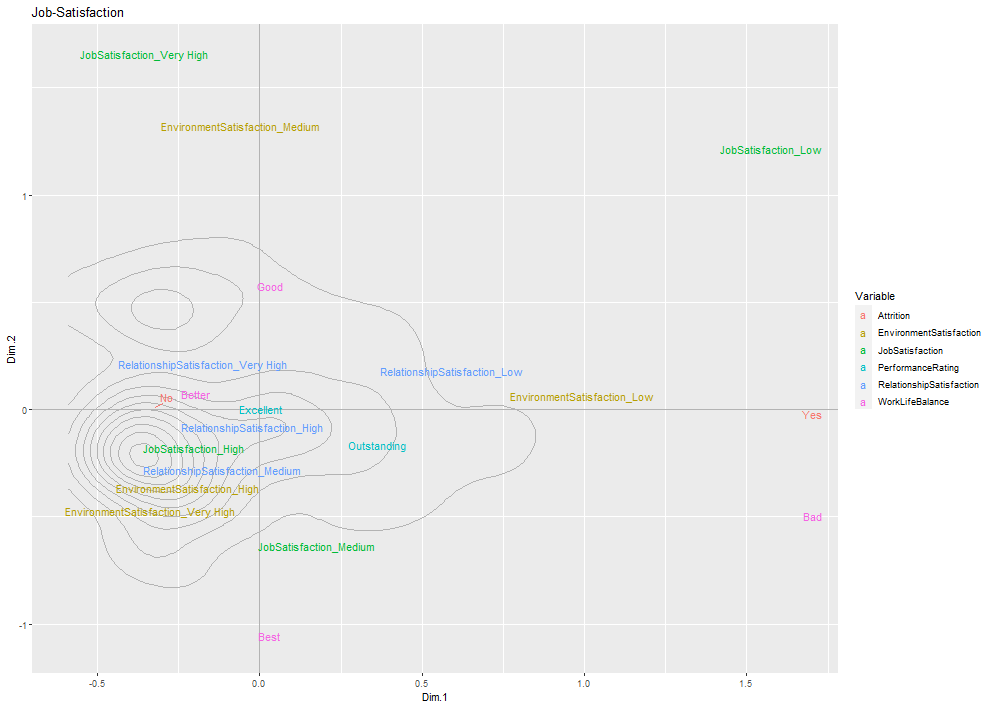

In [83]:
%%R -w 35 -h 25 -u cm
mca5 = mca_df(satisfaction)
mca_plot(mca5[[1]],mca5[[2]],title="Job-Satisfaction")

**Variables that have least explanatory power to Attrition.**

The variables that have least explanatory power are the one that have all categories close to No quitting decision.
- **Personal**: 'Gender','MaritalStatus','DistanceFromHome' 

- **Work-Related**: 'BusinessTravel’,'StockOptionLevel', 'JobInvolvement' 
- **Salary-Related**: 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike' 
- **Working Length**: 'TrainingTimesLastYear' (Only category ‘0 year’ close to quitting) 
- **Satisfaction**: 'RelationshipSatisfaction','PerformanceRating' Table 2.

In Personal group, it is quite difficult to interpret the remaining variables. In Work-Related group, it is very clear that people who have lower job level and position as well as work in human resources and sales are more likely to leave. In Salary-Related group, people who have overtime and low income are more likely to leave. In Working Length, people with short duration of working under a same position or a manager are more likely to leave. In Satisfaction, who have low job satisfaction and bad work-life balance are more likely to leave. 

**Explore Variables With Similar Behaviour Towards Attrition**

In Working Length group 4 variables 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager' behave similarly to Attrition. The observed pattern is the longer the length of years, the more likely employees quit. The coordinates for corresponding categories in each variable are in proximity. However, their contributions to the first 2 dimensions of MCA in the latter part are significant. Thus, none of them will be removed. 

Variables 'JobRole','EducationField','Department' have similar categories and their coordinates are also in proximity. However, their contributions to the first 2 dimensions of MCA in the latter part are significant. Thus, none of them will be removed.  

In [42]:
%%R
sim_variables <- data %>% select('JobRole','EducationField','Department','Attrition')

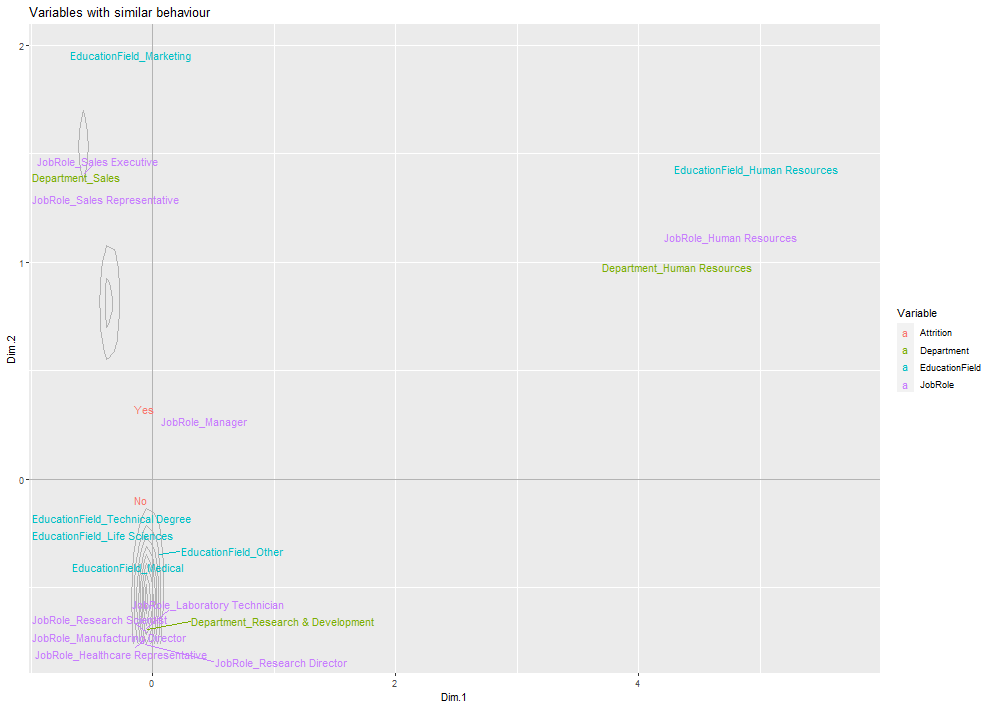

In [84]:
%%R -w 35 -h 25 -u cm
mca6 = mca_df(sim_variables)
mca_plot(mca6[[1]],mca6[[2]],title="Variables with similar behaviour")

### MCA For The Most Important Variables

The remaining variables from 5 groups are gathered and fitted in 1 MCA model with the target variable Attrition. 

In [71]:
%%R
imp_variables <- data %>% select('YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager' ,'EducationField','Department','JobRole','JobLevel','Age','Attrition','NumCompaniesWorked','MonthlyIncome','OverTime','TotalWorkingYears','YearsSinceLastPromotion','WorkLifeBalance','JobSatisfaction','EnvironmentSatisfaction')

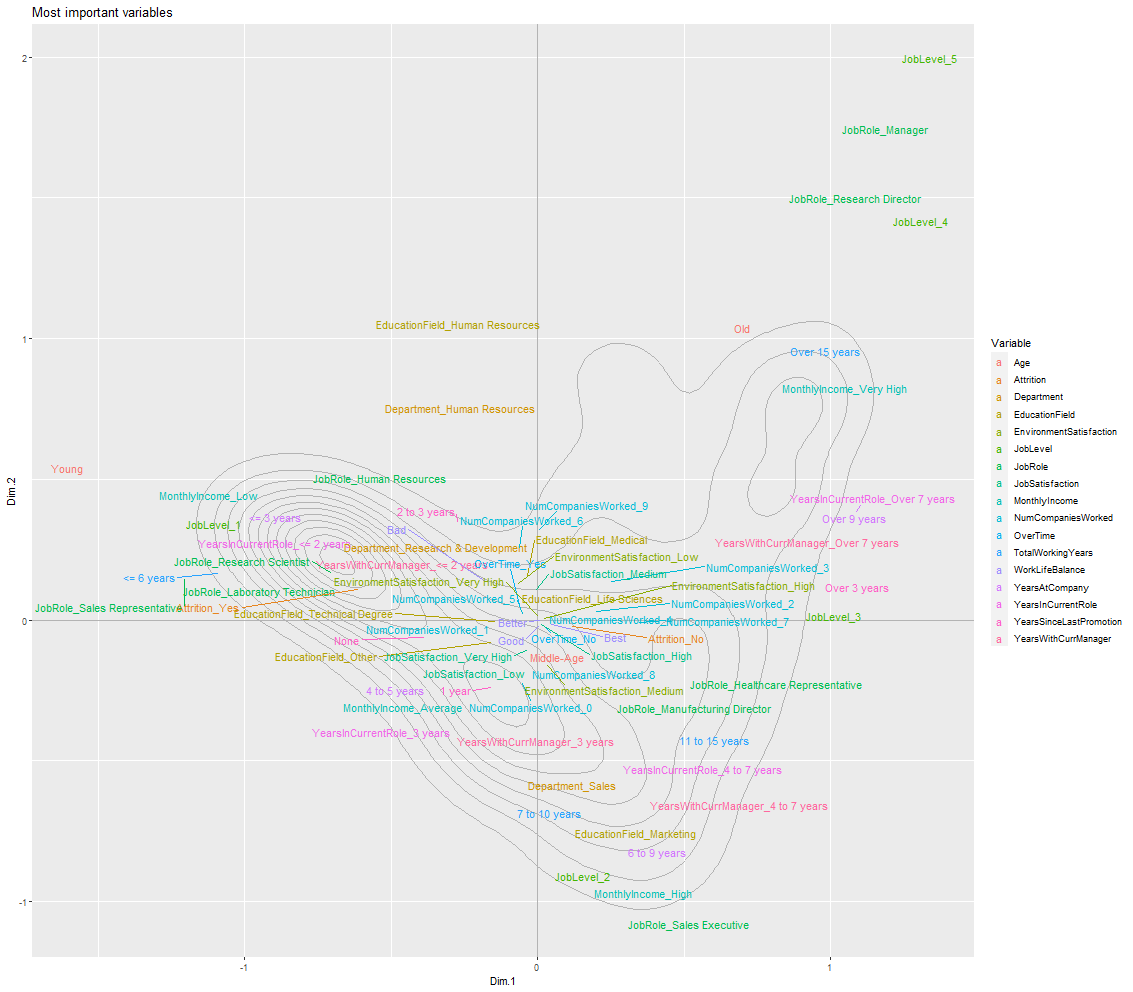

In [85]:
%%R -w 40 -h 35 -u cm
mca = mca_df(imp_variables)
mca_plot(mca[[1]],mca[[2]],title="Most important variables")

***Proportion of variances explained by component dimensions*** 

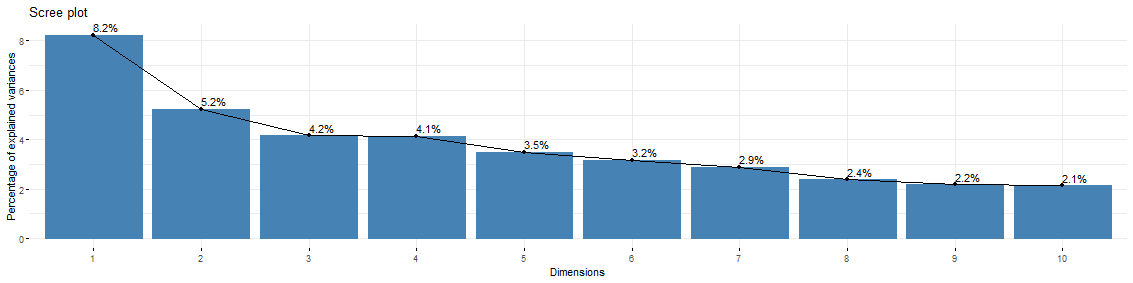

In [56]:
%%R -w 40 -h 10 -u cm
mca_imp_variables <- MCA(as.matrix(imp_variables),graph = FALSE )
fviz_screeplot(mca_imp_variables, addlabels = TRUE,)

Above figure is the proportion of variances explained by 10 component dimensions 

Dimension 1 and 2 explains 8.2% and 5.2% of the variances respectively. Dimension 1 and 2 explain only approximately 14% of the data. There are 59 dimensions in total and the proportion of variances explained by each dimension after dimension 5 are approximately the same. Thus, the data is highly scattered and sparse. 

***Correlation between variables and principal dimensions***

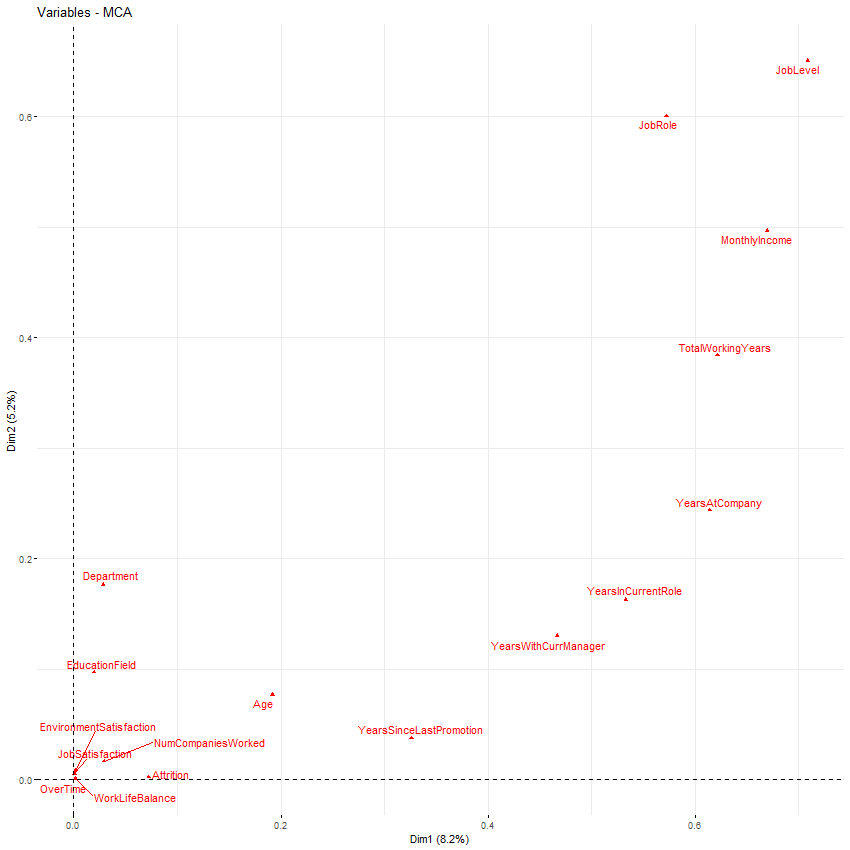

In [57]:
%%R -w 30 -h 30 -u cm
fviz_mca_var(mca_imp_variables, choice = "mca.cor", 
            repel = TRUE, # Avoid text overlapping (slow)
            ggtheme = theme_minimal())

The target variable Attrition correlates with dimension 1 while does not correlates with dimension 2 even though its correlation with dimension 1 is not so strong. Nonetheless, variables that correlate more with dimension 1 contribute more in explaining the Attrition. 

Variables that correlate more significantly with dimension 1 than with dimension 2 are all variables from group Working Length. Variables that correlate significantly with both dimensions are ‘JobLevel’, ‘JobRole’, and ‘MonthlyIncome’. ‘Age’ also correlates more with dimension 1 than with dimension 2 and its correlation is not as strong as the above-mentioned variables. As a result, durations at the company including working years, working under a current manager, and working under 1 position, as well as job level, job role and income are the most important factors affect employee’s quitting decision.  

***Quality of representation of variable categories***

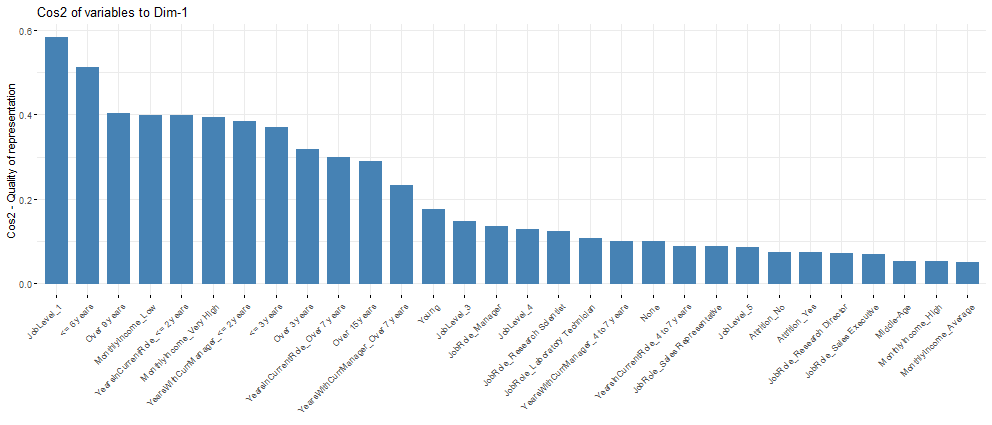

In [61]:
%%R -w 35 -h 15 -u cm
fviz_cos2(mca_imp_variables, choice = "var", axes = 1, top = 30)

***Quality of representation of variable categories in dimension 1***

The variable categories that are presented the best by dimension 1 belong to variables ' JobLevel ', 'MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrMana ger'. These categories belong to 2 extents which are two few years or two many years, low level or high level. 

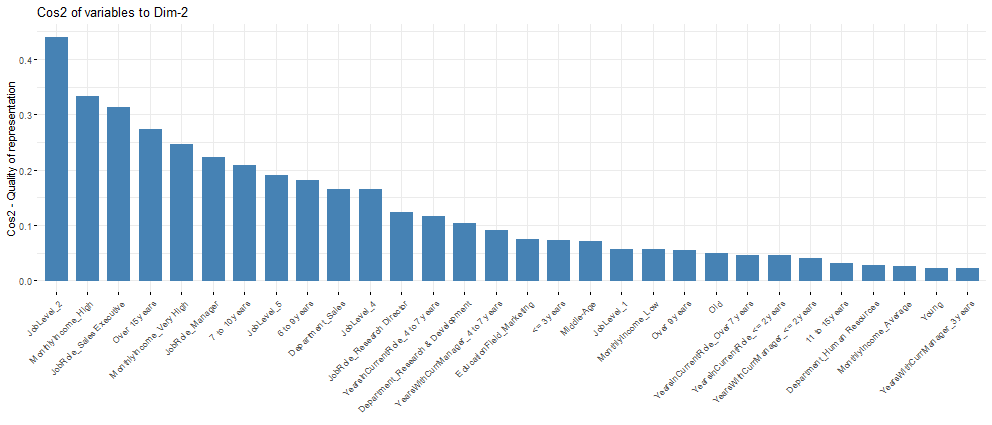

In [63]:
%%R -w 35 -h 15 -u cm
fviz_cos2(mca_imp_variables, choice = "var", axes = 2, top = 30)

***Quality of representation of variable categories in dimension 2***

Except the first most presented category JobLevel_2, the variable categories that are most presented by dimension 2 are high income, high job position and very long working time. 

***Contribution of Variable Categories to the Dimensions***

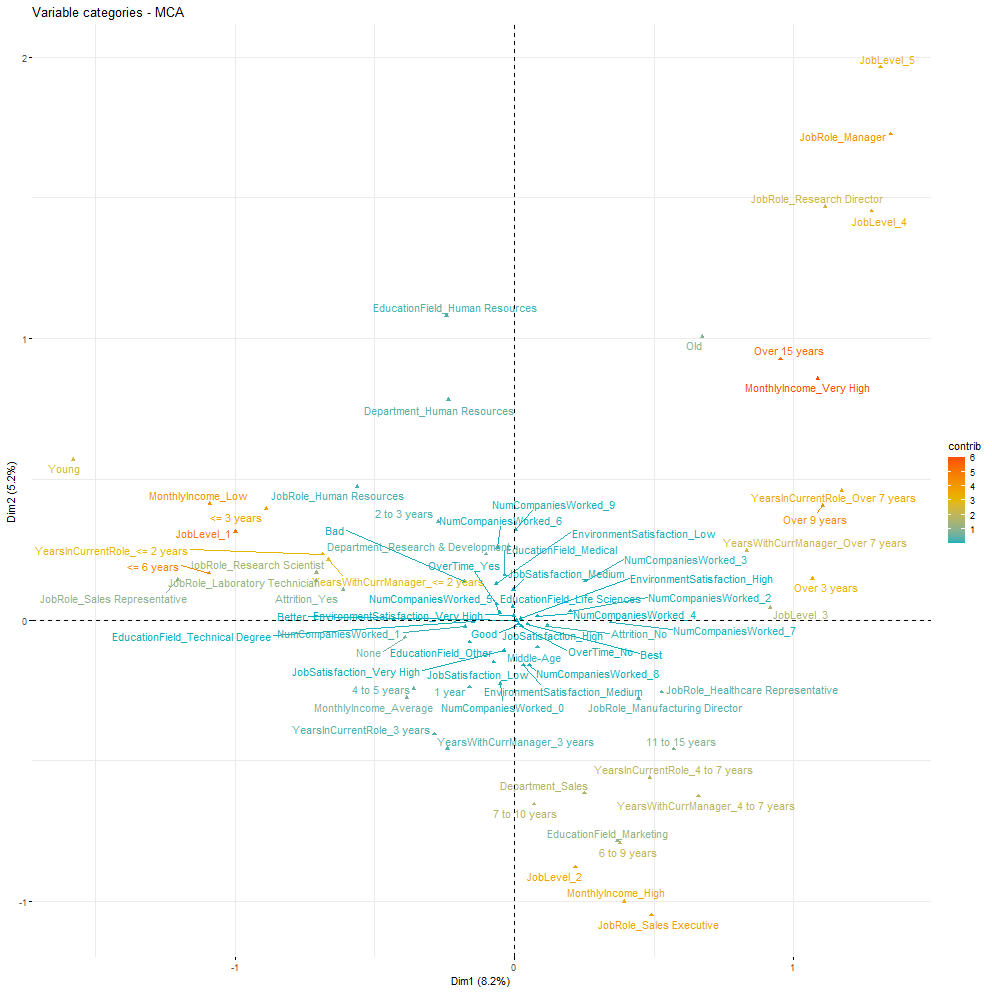

In [64]:
%%R -w 35 -h 35 -u cm

fviz_mca_var(mca_imp_variables, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # avoid text overlapping (slow)
             ggtheme = theme_minimal()
             )

**Figure**: Contribution of variable categories to the dimension 1 and 2 

The contribution of variable categories on dimension 1 and 2 are in line with the result from quality of presentation. Attrition Yes and No are more separated on dimension 1 than on dimension 2 as Attrition Yes contributes more to the negative pole while Attrition No contributes more to the positive pole of dimension 1. 

Income, Working Length and Job Role variables have much more contribution to the first 2 dimensions compared to other variables. 'MonthlyIncome_VeryHigh' and 'TotalWorkingYears_Over 15 years' contributes the most to both dimensions and both are on the positive side of dimension 1 and Attrition No. Following by 'MonthlyIncome_Low', 'JobLevel_1', 'TotalWorkingYears <= 6 years' are on the negative side of dimension 1 and Attrition Yes; 'JobLevel_5', 'JobLevel_4', 'JobRole_Manager' on the positive side of dimension 1 and Attrition No. 

Variable categories mainly scatter on two sides of dimension 1. Categories associated with lower end of the scale are on the negative pole while categories associated with higher end of the scale are on the positive pole.

***Quality and Contribution – Individuals by Groups*** 

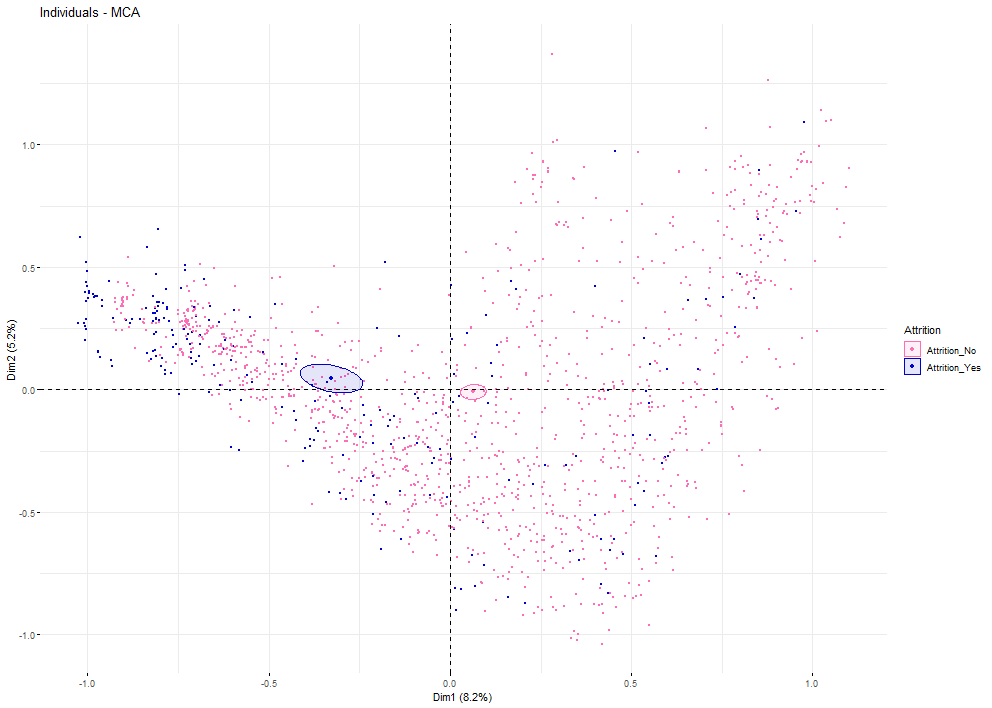

In [66]:
%%R -w 35 -h 25 -u cm

fviz_mca_ind(mca_imp_variables, 
             label = "none", # hide individual labels
             habillage = "Attrition", # color by groups 
             palette = c("hotpink1", "blue3"),
             addEllipses = TRUE, ellipse.type = "confidence",pointsize = 0.7,
             ggtheme = theme_minimal()) 

**Figure** Individual observations by Attrition on dimension 1 and 2 

The dataset is highly imbalanced as there are more observations of staying employees than those of leaving employees. Attrition Yes correlates negatively with dimension 1 while Attrition No slightly positively correlates with dimension 1. As observed from previous section that both Attrition decisions do not correlate with dimension 2. 

### Observation

The variables that explain the variances the most are 'JobLevel','JobRole', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'.  

Employees who have the highest likelihood to leave are young, have low income, low job level, and few year working experiences (less than 6 years). On the contrary, employees who are more likely to stay have high income, high job level and position, many years of working experiences. Human resource employees are more likely to leave than technician and research employees.  

Overall, it can be concluded that leaving employees are more likely not happy with their current work environment, situation, the job itself as well as salary or they are still young and want to experience more.

### Critical Evaluation

The dataset contains so many variables with many categories which makes it difficult for the visualization as well as interpretation. Besides, the dataset is highly sparse and scattered, thus the interpretation on dimension 1 and 2 does not explain strongly everything for the dataset at the whole especially when the target variable Attrition is not well presented by the first 2 dimensions. The interpretation on dimension 1 and 2 in this project can, however, help to identify which variables and categories that account the most to the entire variances as well as what are the most obvious patterns in the dataset. MCA might be not a suitable method to fully address the project’s question. 

Converting numerical variables to categorical variables by grouping values to enable MCA for entire dataset may cause information lost, thus it might produce false information for interpretation. Besides, grouping method by quantiles is subjective and might lead to biased interpretation. 

When dataset has too many variables, the patterns from less contributed variables might be less visible and thus be overlooked in the presence of highly contributed variables to specific dimensions. In the case of this dataset, the behaviours of satisfaction – related variables towards Attrition are clearer to observe when MCA performed on Satisfaction group compared to MCA performed on all variables. The performance on each group, however, is not entirely accurate as they might depend on other variables in other groups. Canonical correlation analysis might be applied to study the relationship between two groups of variables.  
 